# Librerias

In [167]:
# Importación de los Datos y agregación de la librería
import pandas as pd 
import matplotlib.pyplot as plt 
import cufflinks as cf 
import numpy as np
import datetime as dt
from scipy.stats import ks_2samp
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix
import warnings
import plotly.express as px
import seaborn as sns
import missingno as msno
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import statsmodels.formula.api as smf
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPClassifier
pd.set_option("display.max_columns",30)
pd.set_option("display.max_rows",300)
cf.go_offline()
warnings.filterwarnings("ignore")

## Conjunto de Datos

In [168]:
df = pd.read_csv("../Datos/Sismos_grandes.csv")
df

,FECHA,HORA,LATITUD,LONGITUD,PROFUNDIDAD (KM),MAGNITUD,DISTANCIA (KM),ZONA,MUNICIPIO,ESTADO
0,11/12/2022,08:31:30,17.13,-100.638,14,6.0,10,SUR,TECPAN,GUERRERO
1,22/11/2022,10:39:05,30.68,-116.370,10,6.2,37,OESTE,VICENTE GUERRERO,BAJA CALIFORNIA NORTE
2,04/11/2022,04:02:49,28.17,-112.360,10,6.3,92,NORTE,SANTA ROSALIA,BAJA CALIFORNIA SUR
3,02/10/2022,14:00:21,23.80,-108.790,21,5.5,125,NORTE,SAN JOSÉ DEL CABO,BAJA CALIFORNIA SUR
4,01/10/2022,11:36:51,14.89,-94.100,10,5.6,130,SUR,PIJIJIAPAN,CHIAPAS
...,...,...,...,...,...,...,...,...,...,...
608,16/01/1902,17:19:00,17.62,-99.720,33,7.0,21,OESTE,ZUMPANGO DEL RIO,GUERRERO
609,08/12/1901,20:17:00,26.00,-110.000,33,7.0,83,OESTE,AHOME,SINALOA
610,05/03/1901,04:45:00,25.00,-110.000,33,6.9,100,NORTE,LA PAZ,BAJA CALIFORNIA SUR
611,16/05/1900,14:12:00,20.00,-105.000,33,6.9,71,NORTE,AUTLAN DE NAVARRO,JALISCO


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FECHA             613 non-null    object 
 1   HORA              613 non-null    object 
 2   LATITUD           613 non-null    float64
 3   LONGITUD          613 non-null    float64
 4   PROFUNDIDAD (KM)  613 non-null    int64  
 5   MAGNITUD          613 non-null    float64
 6   DISTANCIA (KM)    613 non-null    int64  
 7   ZONA              613 non-null    object 
 8   MUNICIPIO         613 non-null    object 
 9   ESTADO            613 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 48.0+ KB


### Análisis Exploratorio

In [170]:
df.shape

(613, 10)

In [171]:
def completitud_datos_nulos(df):
    return df.isnull().sum().sort_values(ascending=False) / df.shape[0]

In [172]:
df.isnull().sum().sort_values(ascending=False) / df.shape[0]

FECHA               0.0
HORA                0.0
LATITUD             0.0
LONGITUD            0.0
PROFUNDIDAD (KM)    0.0
MAGNITUD            0.0
DISTANCIA (KM)      0.0
ZONA                0.0
MUNICIPIO           0.0
ESTADO              0.0
dtype: float64

<Axes: >

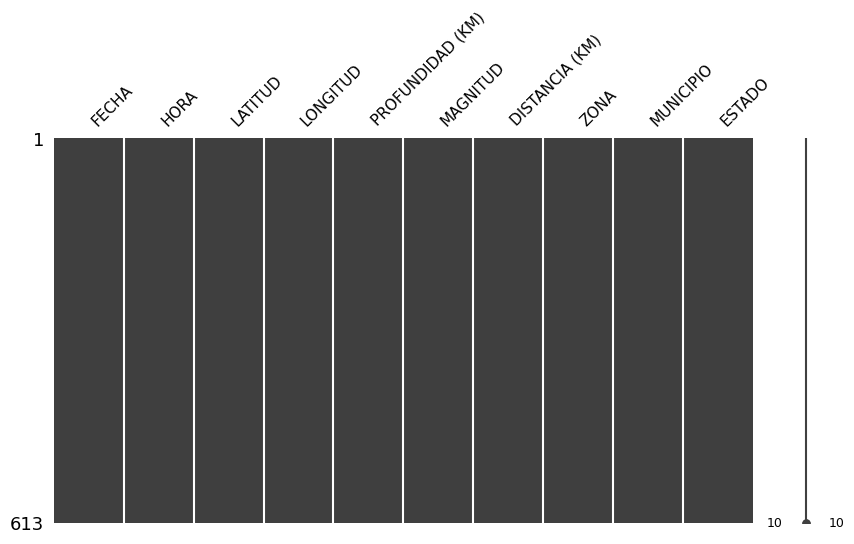

In [173]:
msno.matrix(df, figsize=(10,5), fontsize=11)

### Definición de Variables

In [174]:
df.describe()

,LATITUD,LONGITUD,PROFUNDIDAD (KM),MAGNITUD,DISTANCIA (KM)
count,613.000000,613.000000,613.000000,613.000000,613.000000
mean,18.278238,-100.282325,35.703100,6.177977,102.601958
std,4.542370,7.165077,35.901553,0.640099,110.191343
min,10.271000,-119.415000,1.000000,5.500000,2.000000
25%,15.430000,-105.760000,12.000000,5.600000,34.000000
50%,17.000000,-99.020000,24.000000,6.000000,67.000000
75%,18.815800,-94.090000,37.000000,6.700000,130.000000
max,33.265800,-86.610000,216.000000,8.200000,841.000000


#### Variables continuas

In [175]:
var_continua = [x for x in list(df.describe())]
var_continua

['LATITUD', 'LONGITUD', 'PROFUNDIDAD (KM)', 'MAGNITUD', 'DISTANCIA (KM)']

#### Variables categóricas

In [176]:
var_categorica = [x for x in df.columns if x not in var_continua+['FECHA']]
var_categorica

['HORA', 'ZONA', 'MUNICIPIO', 'ESTADO']

In [177]:
var_anio = ['FECHA']

### Clusters antes de tratamiento de datos

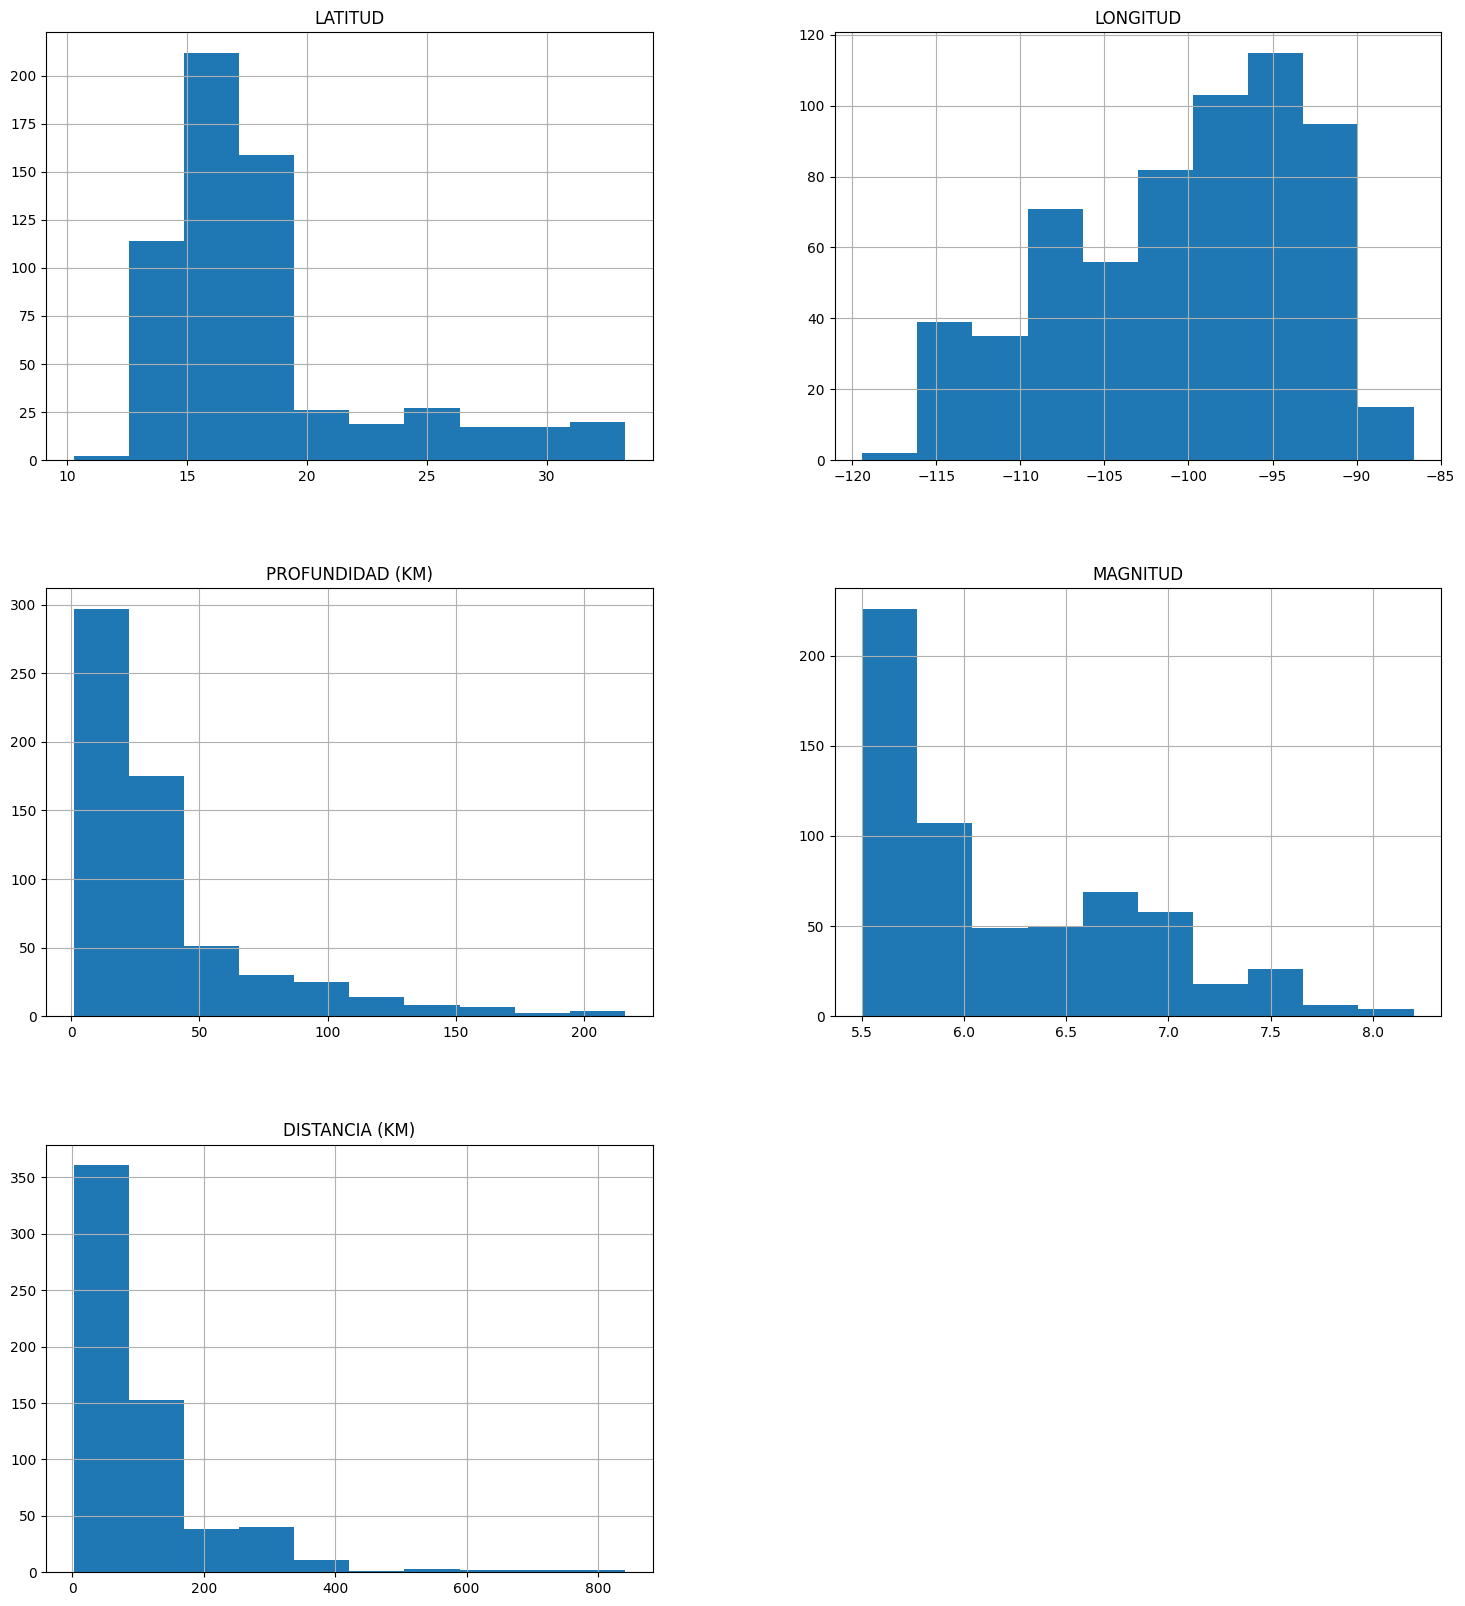

In [178]:
df[var_continua].hist(figsize=(18,20));

In [179]:
X = df[var_continua].reset_index(drop=True).copy()
Xc= X

In [180]:
scaler = StandardScaler()
scaler.fit(X)
Xs = pd.DataFrame(scaler.transform(X), columns=X.columns)
pca=PCA(n_components=5)
mds= MDS(n_components=5)
tsn=TSNE()
pca.fit(Xs)


PCA(n_components=5)

In [181]:
pca.explained_variance_ratio_.cumsum()


array([0.41817733, 0.65918987, 0.83477702, 0.97882648, 1.        ])

In [182]:
Xp = pd.DataFrame(pca.transform(Xs), columns=["p1","p2", "p3", "p4", "p5"])

In [183]:
lst_in = []
for k in range(1,9):
    km = KMeans(n_clusters=k)
    km.fit(Xs)
    lst_in.append(km.inertia_)

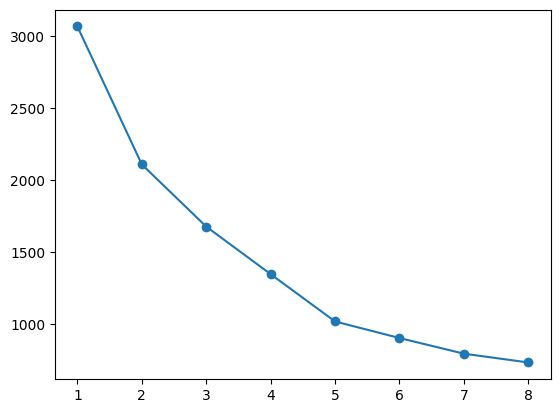

In [184]:
plt.plot(range(1,9),lst_in,marker='o');

In [185]:
minmax = MinMaxScaler()

In [186]:
minmax.fit(X)

MinMaxScaler()

In [187]:
Xmm = pd.DataFrame(minmax.transform(X), columns=X.columns)

In [188]:
lst = []
for k in range(1,9):
    km = KMeans(n_clusters=k)
    km.fit(Xmm)
    lst.append(km.inertia_)

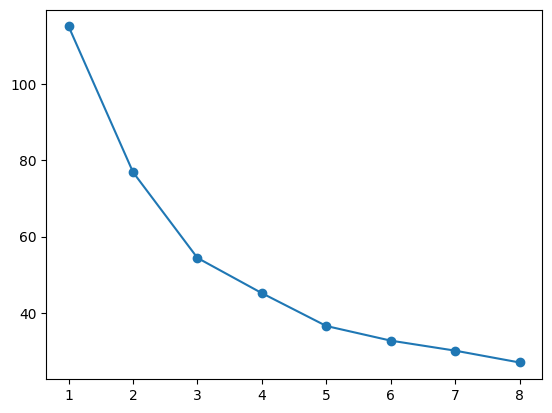

In [189]:
plt.plot(range(1,9),lst,marker='o');

In [190]:
cl_xp = GaussianMixture(n_components=4, max_iter=2000)
#cl_xt = GaussianMixture(n_components=3, max_iter=2000)

In [191]:
cl_xp.fit(Xp)
#cl_xt.fit(Xt)

GaussianMixture(max_iter=2000, n_components=4)

In [192]:
Xp["cl"] = cl_xp.predict(Xp)
#Xt["cl"] = cl_xt.predict(Xt)

In [193]:
cf.go_offline()
fig = px.scatter_3d(Xp, x='p1', y='p2', z='p3',
              color='cl')
fig.show()

In [194]:
print("PCA")
Xp.cl.value_counts(True)

PCA


0    0.327896
2    0.287113
3    0.233279
1    0.151713
Name: cl, dtype: float64

### Gráficación de Variables Continuas (Histograma)

#### Histograma con valores extremos

#### Eliminación de valores extremos

In [195]:
percentiles = {}
for var in var_continua:
    perc1 = df[f"{var}"].describe([x/10 for x in range(10)] + [0.01, 0.05, 0.25, 0.75, 0.95, 0.99]).to_frame().loc['1%',:]
    perc99 = df[f"{var}"].describe([x/10 for x in range(10)] + [0.01, 0.05, 0.25, 0.75, 0.95, 0.99]).to_frame().loc['99%',:]
    minimo = df[f"{var}"].describe([x/10 for x in range(10)] + [0.01, 0.05, 0.25, 0.75, 0.95, 0.99]).to_frame().loc['min',:]
    maximo = df[f"{var}"].describe([x/10 for x in range(10)] + [0.01, 0.05, 0.25, 0.75, 0.95, 0.99]).to_frame().loc['max',:]
    
    izq = round(perc1[0],3)
    der = round(perc99[0],3)
    print(minimo[0])
    print(izq)
    print(der)
    print(maximo[0])
    outliersPerc = df[f"{var}"][~((df[f"{var}"]<=izq) | (df[f"{var}"]>=der))].to_frame()
    percentiles[f"{var}"] = (outliersPerc[var].shape[0])
    df[f"{var}"] = outliersPerc[var]

10.271
13.257
32.674
33.2658
-119.415
-115.748
-88.474
-86.61
1.0
4.0
170.64
216.0
5.5
5.5
7.8
8.2
2.0
5.0
565.56
841.0


#### Gráficas después de elminación de valores extremos

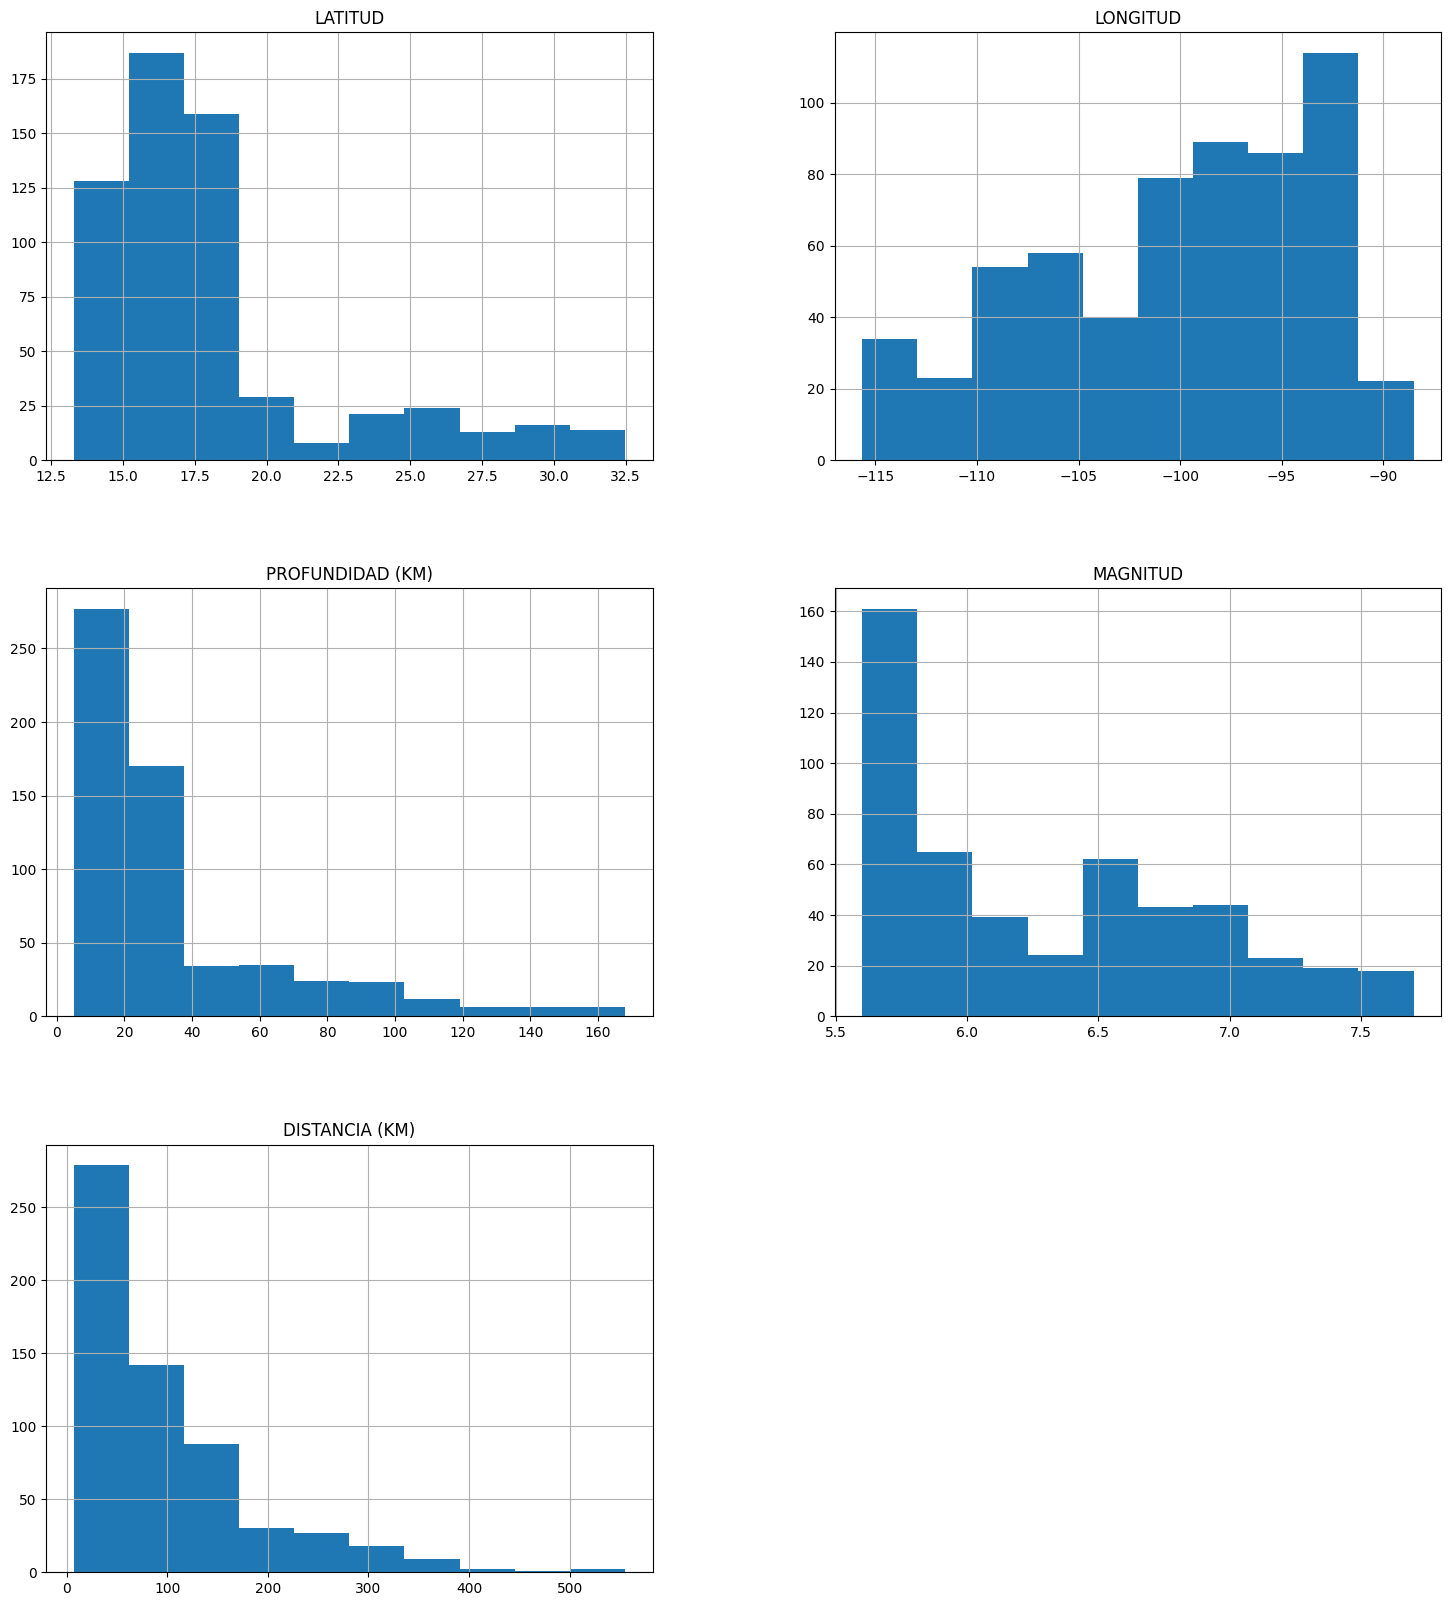

In [196]:
df[var_continua].hist(figsize=(18,20));

#### Gráficas de Variables categóricas (Barras)

In [197]:
for x in df[var_categorica]:
    print(x)
    df.sample(frac=0.01)[x].iplot(kind="bar",theme="white")

HORA


ZONA


MUNICIPIO


ESTADO


##### Tratamiento de la fecha

In [198]:
df["year"] = pd.to_datetime(df["FECHA"]).dt.year
(df["year"].min(), df["year"].max())

(1900, 2022)

### Ingeniería de Datos

In [199]:
df["year"] = df["year"].map(lambda x: str(x).split(".")[0])

In [200]:
completitud_datos_nulos(df[var_continua])

MAGNITUD            0.187602
PROFUNDIDAD (KM)    0.032626
DISTANCIA (KM)      0.024470
LATITUD             0.022838
LONGITUD            0.022838
dtype: float64

#### Imputación de los datos continuos

In [201]:
X = df[['LATITUD', 'LONGITUD', 'PROFUNDIDAD (KM)', 'MAGNITUD', 'DISTANCIA (KM)']].copy()
im = SimpleImputer(strategy="median") 

In [202]:
Xi = pd.DataFrame(im.fit_transform(X), columns=['LATITUD', 'LONGITUD', 'PROFUNDIDAD (KM)', 'MAGNITUD', 'DISTANCIA (KM)'])
l_ks = []
Xi

,LATITUD,LONGITUD,PROFUNDIDAD (KM),MAGNITUD,DISTANCIA (KM)
0,17.13,-100.638,14.0,6.0,10.0
1,30.68,-99.020,10.0,6.2,37.0
2,28.17,-112.360,10.0,6.3,92.0
3,23.80,-108.790,21.0,6.2,125.0
4,14.89,-94.100,10.0,5.6,130.0
...,...,...,...,...,...
608,17.62,-99.720,33.0,7.0,21.0
609,26.00,-110.000,33.0,7.0,83.0
610,25.00,-110.000,33.0,6.9,100.0
611,20.00,-105.000,33.0,6.9,71.0


In [203]:

for v in ['LATITUD', 'LONGITUD', 'PROFUNDIDAD (KM)', 'MAGNITUD', 'DISTANCIA (KM)']:
    l_ks.append([v,ks_2samp(X[v].dropna(),Xi[v]).statistic])
ks = pd.DataFrame(l_ks, columns=["feat","ks"])
print((ks.ks>=0.1).sum())

ks

0


,feat,ks
0,LATITUD,0.011248
1,LONGITUD,0.011400
2,PROFUNDIDAD (KM),0.016286
3,MAGNITUD,0.093424
4,DISTANCIA (KM),0.012153


In [204]:
def complete_continuous_variables(df,col,strategy='median'):
    X = df[col].copy()
    im = SimpleImputer(strategy=strategy)
    Xi = pd.DataFrame(im.fit_transform(X),columns=col)
    l_ks = []
    for v in col:
        l_ks.append([v,ks_2samp(X[v].dropna(),Xi[v]).statistic])
    ks = pd.DataFrame(l_ks,columns=['feat','ks'])
    #print(ks)
    print((ks.ks>=0.1).sum())
    df[col] = im.transform(df[col].copy())
    return df

In [205]:
complete_continuous_variables(df,var_continua)

0


,FECHA,HORA,LATITUD,LONGITUD,PROFUNDIDAD (KM),MAGNITUD,DISTANCIA (KM),ZONA,MUNICIPIO,ESTADO,year
0,11/12/2022,08:31:30,17.13,-100.638,14.0,6.0,10.0,SUR,TECPAN,GUERRERO,2022
1,22/11/2022,10:39:05,30.68,-99.020,10.0,6.2,37.0,OESTE,VICENTE GUERRERO,BAJA CALIFORNIA NORTE,2022
2,04/11/2022,04:02:49,28.17,-112.360,10.0,6.3,92.0,NORTE,SANTA ROSALIA,BAJA CALIFORNIA SUR,2022
3,02/10/2022,14:00:21,23.80,-108.790,21.0,6.2,125.0,NORTE,SAN JOSÉ DEL CABO,BAJA CALIFORNIA SUR,2022
4,01/10/2022,11:36:51,14.89,-94.100,10.0,5.6,130.0,SUR,PIJIJIAPAN,CHIAPAS,2022
...,...,...,...,...,...,...,...,...,...,...,...
608,16/01/1902,17:19:00,17.62,-99.720,33.0,7.0,21.0,OESTE,ZUMPANGO DEL RIO,GUERRERO,1902
609,08/12/1901,20:17:00,26.00,-110.000,33.0,7.0,83.0,OESTE,AHOME,SINALOA,1901
610,05/03/1901,04:45:00,25.00,-110.000,33.0,6.9,100.0,NORTE,LA PAZ,BAJA CALIFORNIA SUR,1901
611,16/05/1900,14:12:00,20.00,-105.000,33.0,6.9,71.0,NORTE,AUTLAN DE NAVARRO,JALISCO,1900


#### Análisis Bivariado

In [206]:
correlacion = Xi.corr()
correlacion

,LATITUD,LONGITUD,PROFUNDIDAD (KM),MAGNITUD,DISTANCIA (KM)
LATITUD,1.000000,-0.820306,-0.239319,0.020393,0.038381
LONGITUD,-0.820306,1.000000,0.399066,0.026344,-0.159063
PROFUNDIDAD (KM),-0.239319,0.399066,1.000000,0.134980,-0.216369
MAGNITUD,0.020393,0.026344,0.134980,1.000000,-0.189999
DISTANCIA (KM),0.038381,-0.159063,-0.216369,-0.189999,1.000000


<Axes: >

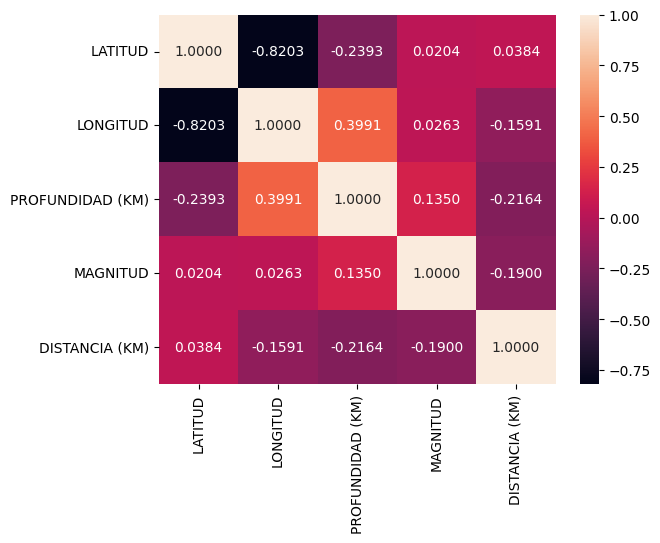

In [207]:
sns.heatmap(correlacion, annot=True, fmt=".4f")

### Modelación no supervisada

In [208]:
X = df[var_continua].reset_index(drop=True).copy()
Xc= X

In [209]:
scaler = StandardScaler()
scaler.fit(X)
Xs = pd.DataFrame(scaler.transform(X), columns=X.columns)
pca=PCA(n_components=5)
mds= MDS(n_components=5)
tsn=TSNE()
pca.fit(Xs)

PCA(n_components=5)

In [210]:
pca.explained_variance_ratio_.cumsum()

array([0.41523309, 0.66235209, 0.82399289, 0.96844313, 1.        ])

In [211]:
Xp = pd.DataFrame(pca.transform(Xs), columns=["p1","p2", "p3", "p4", "p5"])

### Clúster (Datos Tratados)

In [212]:
lst_in = []
for k in range(1,9):
    km = KMeans(n_clusters=k)
    km.fit(Xs)
    lst_in.append(km.inertia_)

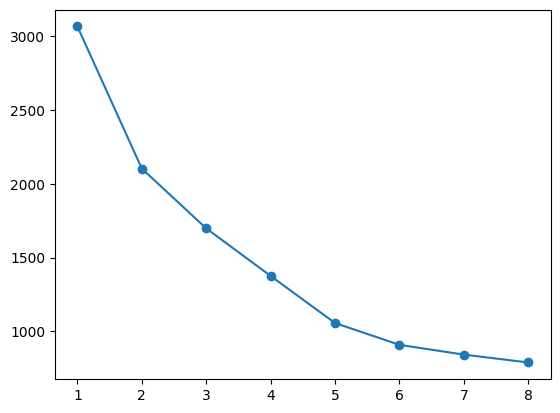

In [213]:
plt.plot(range(1,9),lst_in,marker='o');

In [214]:
minmax = MinMaxScaler()

In [215]:
minmax.fit(X)

MinMaxScaler()

In [216]:
Xmm = pd.DataFrame(minmax.transform(X), columns=X.columns)

In [217]:
lst = []
for k in range(1,9):
    km = KMeans(n_clusters=k)
    km.fit(Xmm)
    lst.append(km.inertia_)

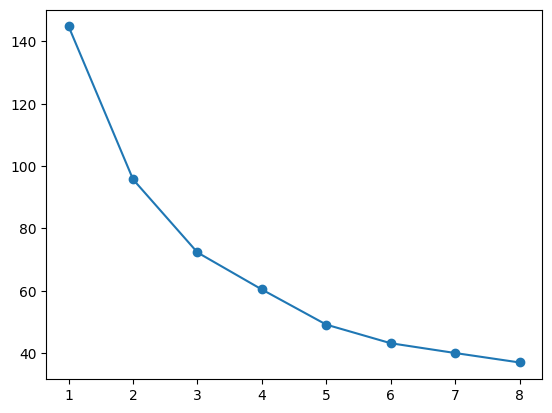

In [218]:
plt.plot(range(1,9),lst,marker='o');

In [219]:
cl_xp = GaussianMixture(n_components=5, max_iter=2000)
#cl_xt = GaussianMixture(n_components=3, max_iter=2000)

In [220]:
cl_xp.fit(Xp)
#cl_xt.fit(Xt)

GaussianMixture(max_iter=2000, n_components=5)

In [221]:
Xp["cl"] = cl_xp.predict(Xp)
#Xt["cl"] = cl_xt.predict(Xt)

In [222]:
cf.go_offline()
fig = px.scatter_3d(Xp, x='p1', y='p2', z='p3',
              color='cl')
fig.show()

In [223]:
print("PCA")
Xp.cl.value_counts(True)

PCA


1    0.324633
0    0.202284
3    0.168026
2    0.154976
4    0.150082
Name: cl, dtype: float64

### Perfilamiento

In [224]:
perfilamiento = pd.concat([X,Xp["cl"]], axis=1)

In [225]:
perfilamiento.groupby(["cl"]).mean()

,LATITUD,LONGITUD,PROFUNDIDAD (KM),MAGNITUD,DISTANCIA (KM)
cl,,,,,
0,17.075379,-99.181691,35.556452,6.807258,38.354839
1,15.672720,-96.821606,19.723618,5.992965,82.341709
2,18.134007,-102.936242,22.147368,6.147368,241.168421
3,25.995186,-110.865505,16.514563,6.257282,95.106796
4,16.167560,-94.212270,96.173913,6.332609,54.608696


In [226]:
perfilamiento.mean().to_frame().T

,LATITUD,LONGITUD,PROFUNDIDAD (KM),MAGNITUD,DISTANCIA (KM),cl
0,18.146605,-100.21476,34.236542,6.276998,96.040783,1.738989


### Modelos de Clasificación

In [227]:
df["ZONA"] = df["ZONA"].replace({"NORTE": 1, "SUR": 2, "ESTE": 3, "OESTE": 4})
df["ZONA"] = df["ZONA"].astype(int)

In [228]:
df

,FECHA,HORA,LATITUD,LONGITUD,PROFUNDIDAD (KM),MAGNITUD,DISTANCIA (KM),ZONA,MUNICIPIO,ESTADO,year
0,11/12/2022,08:31:30,17.13,-100.638,14.0,6.0,10.0,2,TECPAN,GUERRERO,2022
1,22/11/2022,10:39:05,30.68,-99.020,10.0,6.2,37.0,4,VICENTE GUERRERO,BAJA CALIFORNIA NORTE,2022
2,04/11/2022,04:02:49,28.17,-112.360,10.0,6.3,92.0,1,SANTA ROSALIA,BAJA CALIFORNIA SUR,2022
3,02/10/2022,14:00:21,23.80,-108.790,21.0,6.2,125.0,1,SAN JOSÉ DEL CABO,BAJA CALIFORNIA SUR,2022
4,01/10/2022,11:36:51,14.89,-94.100,10.0,5.6,130.0,2,PIJIJIAPAN,CHIAPAS,2022
...,...,...,...,...,...,...,...,...,...,...,...
608,16/01/1902,17:19:00,17.62,-99.720,33.0,7.0,21.0,4,ZUMPANGO DEL RIO,GUERRERO,1902
609,08/12/1901,20:17:00,26.00,-110.000,33.0,7.0,83.0,4,AHOME,SINALOA,1901
610,05/03/1901,04:45:00,25.00,-110.000,33.0,6.9,100.0,1,LA PAZ,BAJA CALIFORNIA SUR,1901
611,16/05/1900,14:12:00,20.00,-105.000,33.0,6.9,71.0,1,AUTLAN DE NAVARRO,JALISCO,1900


In [229]:
var_clasificacion = list(df.describe())

In [230]:
var_clasificacion = [x for x in var_clasificacion if x not in 'ZONA']

In [231]:
vard = [x for x in df.columns if x not in var_clasificacion+['ZONA']]
vard

['FECHA', 'HORA', 'MUNICIPIO', 'ESTADO', 'year']

In [232]:
target = 'ZONA'

In [233]:
X = df[var_clasificacion].copy()

In [234]:
y = df[target].copy()

In [235]:
sc = MinMaxScaler()
Xs = pd.DataFrame(sc.fit_transform(X), columns=var_clasificacion)

In [236]:
y = y.astype(int)

In [237]:
Xt, Xv, yt, yv = train_test_split(Xs,y, train_size=0.7)

In [238]:
def entrenar(param, modelo, X,y):
    grid = RandomizedSearchCV(param_distributions=param,
                             n_jobs=-1,
                             n_iter=10,
                             cv=4,
                             estimator=modelo,
                             error_score='raise')
    grid.fit(X,y)
    return grid, grid.best_estimator_, grid.best_score_, grid.best_params_

In [239]:
def metricas(Xt, Xv, yt, yv, modelo):
    d = {'train':round(roc_auc_score(y_true=yt, y_score=modelo.predict_proba(Xt), multi_class='ovo'),3),
         'validate':round(roc_auc_score(y_true=yv, y_score=modelo.predict_proba(Xv), multi_class='ovo'),3)
        }
    return d


### Red Neuronal 

In [240]:
param_mlpc = dict(hidden_layer_sizes = [(a,b,c,) for a in range(len(var_clasificacion), len(var_clasificacion)*2) for b in range(len(var_clasificacion), len(var_clasificacion)*2) for c in range(len(var_clasificacion), len(var_clasificacion)*2)],
             activation = ['identity', 'logistic', 'tanh', 'relu'],
             solver = ['lbfgs', 'sgd', 'adam'],
             alpha = np.arange(0.0001, 0.001, 0.0001),
             learning_rate = ['constant', 'invscaling', 'adaptive'])

In [241]:
modelo_mlpc = MLPClassifier()
grid_mlpc, best_estimator_mlpc, score_mlpc, params_mlpc = entrenar(param_mlpc, modelo_mlpc, Xt, yt)
metricas(Xt,Xv,yt,yv,best_estimator_mlpc)
y_pred = best_estimator_mlpc.predict(Xv)

In [242]:
labels = [1, 2, 3, 4]
cm = confusion_matrix(yv, y_pred, labels=labels)

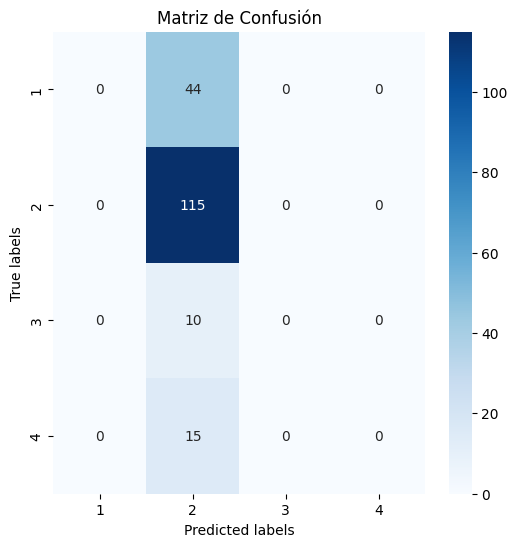

In [243]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Matriz de Confusión')
plt.show()

In [244]:
modelo_mlpc = MLPClassifier(alpha=0.001)

In [245]:
score_mlpc

0.7086362062997578

In [246]:
best_estimator_mlpc

MLPClassifier(activation='identity', alpha=0.0007000000000000001,
              hidden_layer_sizes=(8, 9, 9), solver='sgd')

In [247]:
modelo_mlpc

MLPClassifier(alpha=0.001)

### Random Forest

In [248]:
param = dict(n_estimators = range(2,10),
             max_depth = range(2,6),
             max_features = range(2,len(var_clasificacion)),
             criterion = ['gini', 'entropy'])

In [249]:
param = dict(n_estimators=list(range(1, 100, 25)),
                                    criterion=['gini', 'entropy'],
                                    max_depth=[x for x in list(range(2, 5))] + [None],
                                    min_samples_split=[x for x in list(range(2, 4))],
                                    min_samples_leaf=[x for x in list(range(2, 4))],
                                    max_features=[None] + [i * .05 for i in list(range(2, 4))],
                                    max_leaf_nodes=list(range(2, 10)) + [None],
                                    min_impurity_decrease=[x * .10 for x in list(range(2, 4))],
                                    oob_score=[True,False],
                                    warm_start=[True, False],
                                    class_weight=[None, 'balanced'],
                                    max_samples=[None],
                                    random_state=[42])

In [250]:
modelo = RandomForestClassifier()

In [251]:
modelo, best_estimator, score, params = entrenar(param, modelo, Xt, yt)

In [252]:
metricas(Xt,Xv,yt,yv,modelo)

{'train': 0.5, 'validate': 0.5}

In [253]:
y_pred = modelo.predict(Xv)

In [254]:
cm_randomForest = confusion_matrix(yv, y_pred)

In [255]:
cm_randomForest

array([[  0,  44,   0,   0],
       [  0, 115,   0,   0],
       [  0,  10,   0,   0],
       [  0,  15,   0,   0]], dtype=int64)

In [256]:
serie_y = pd.Series(y)
serie_y.value_counts()

2    419
1    119
4     40
3     35
Name: ZONA, dtype: int64

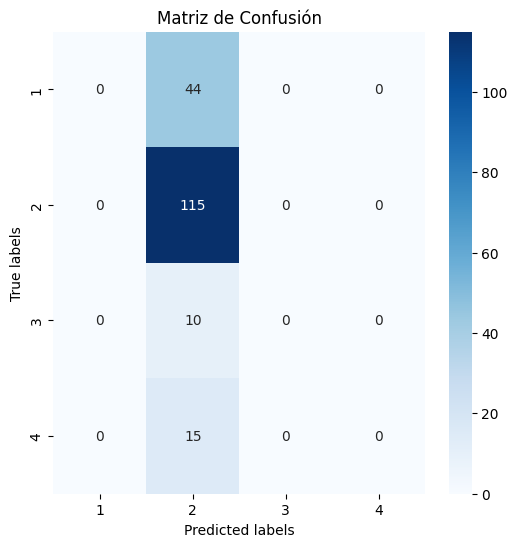

In [257]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm_randomForest, annot=True, cmap='Blues', fmt='g',
            xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Matriz de Confusión')
plt.show()

### Ada Boost

In [258]:
param_adab = dict(n_estimators = range(2,5),
             learning_rate = np.arange(0.1,1,0.1),
             algorithm = ['SAMME.R'])

In [259]:
modelo_adab = AdaBoostClassifier()
modelo_adab, best_estimator, score, params = entrenar(param_adab, modelo_adab, Xt, yt)
metricas(Xt,Xv,yt,yv,modelo_adab)

{'train': 0.686, 'validate': 0.609}

In [260]:
y_pred = modelo_adab.predict(Xv)

In [261]:
cm_adaBoost = confusion_matrix(yv, y_pred)

In [262]:
cm_adaBoost

array([[  1,  43,   0,   0],
       [  2, 113,   0,   0],
       [  0,  10,   0,   0],
       [  0,  15,   0,   0]], dtype=int64)

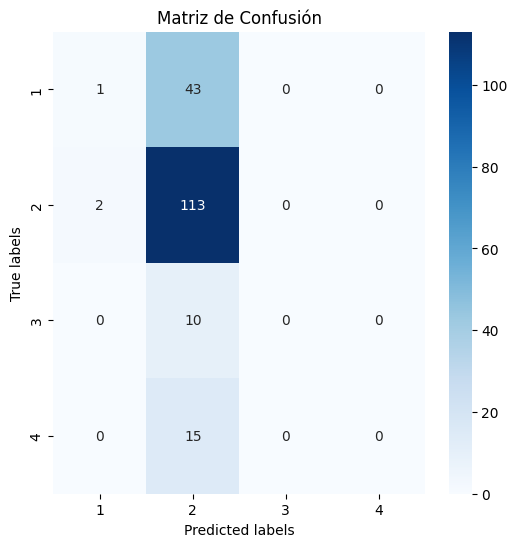

In [263]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm_adaBoost, annot=True, cmap='Blues', fmt='g',
            xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Matriz de Confusión')
plt.show()

### Analisis Discriminante

In [264]:
param_lda = dict(solver = ['svd', 'lsqr', 'eigen'])

In [265]:
modelo = LinearDiscriminantAnalysis()
modelo, best_estimator, score, params = entrenar(param_lda, modelo, Xt, yt)
metricas(Xt,Xv,yt,yv,modelo)

{'train': 0.718, 'validate': 0.669}

In [266]:
y_pred = modelo.predict(Xv)

In [267]:
cm_discriminante = confusion_matrix(yv, y_pred)

In [268]:
cm_discriminante

array([[  8,  36,   0,   0],
       [  7, 108,   0,   0],
       [  1,   8,   1,   0],
       [  2,  13,   0,   0]], dtype=int64)

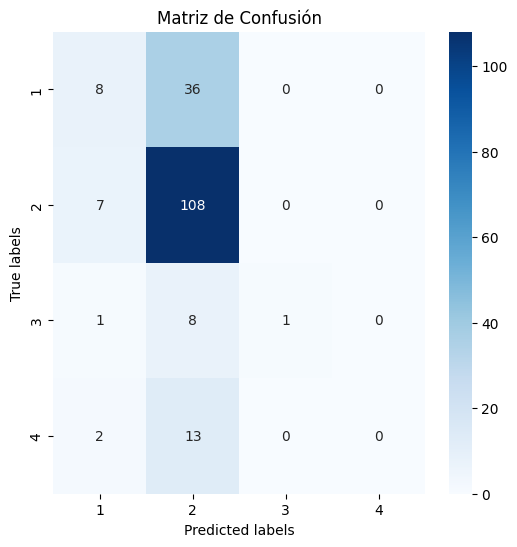

In [269]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm_discriminante, annot=True, cmap='Blues', fmt='g',
            xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Matriz de Confusión')
plt.show()

### Maquina Vector Soporte 

In [270]:
param_svc = dict(C = np.arange(0,2,0.1),
             kernel = ['linear','poly','rbf','sigmoid'],
             degree = range(2,6),
             gamma = ['scale','auto'], 
             probability = [True])

In [271]:
scaler = StandardScaler()
Xt_scaled = scaler.fit_transform(Xt)
Xv_scaled = scaler.transform(Xv)

In [273]:
modelo_svc = SVC()
modelo_svc, best_estimator, score, params = entrenar(param_svc, modelo_svc, Xt_scaled, yt)
metricas(Xt_scaled,Xv_scaled,yt,yv,modelo_svc)

{'train': 0.508, 'validate': 0.552}

In [274]:
y_pred_train = modelo_svc.predict(Xt_scaled)
y_pred_val = modelo_svc.predict(Xv_scaled)

In [275]:
cm_train = confusion_matrix(yt, y_pred_train)
cm_val = confusion_matrix(yv, y_pred_val)

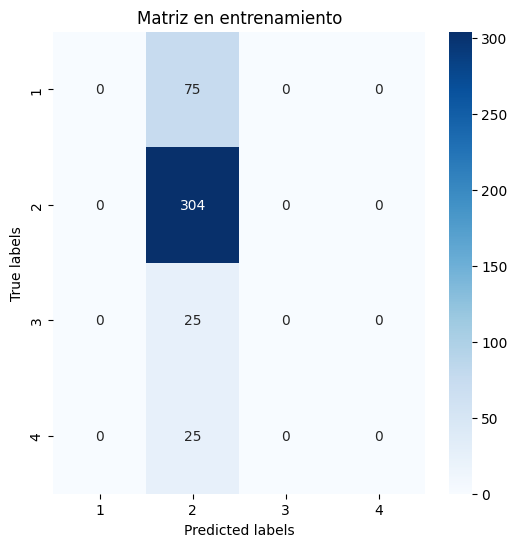

In [276]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g',
            xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Matriz en entrenamiento')
plt.show()

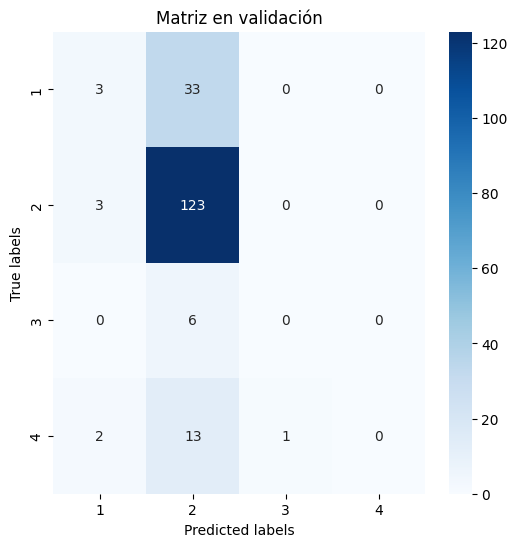

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm_val, annot=True, cmap='Blues', fmt='g',
            xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Matriz en validación')
plt.show()

### Modelo de Regresion

In [283]:
X = df[['LATITUD', 'LONGITUD', 'PROFUNDIDAD (KM)', 'DISTANCIA (KM)', 'ZONA']]
y = df['MAGNITUD']

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [285]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [286]:
modelo = LinearRegression()

In [287]:
modelo.fit(X_train_scaled, y_train)

LinearRegression()

In [288]:
y_predict = modelo.predict(X_test_scaled)

In [289]:
print('Coeficientes:', modelo.coef_)
print('Error cuadrático medio:', mean_squared_error(y_test, y_predict))
print('Coeficiente de determinación:', r2_score(y_test, y_predict))

Coeficientes: [ 0.048131    0.02395814  0.04010025 -0.08193592 -0.00507179]
Error cuadrático medio: 0.2673446795261971
Coeficiente de determinación: 0.06490552167387165


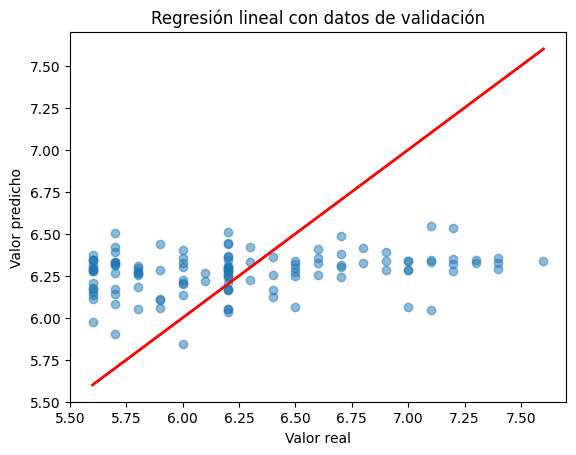

In [291]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict, alpha=0.5)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
ax.set_xlabel('Valor real')
ax.set_ylabel('Valor predicho')
ax.set_title('Regresión lineal con datos de validación')
plt.show()

#### Regresión de Ridge

In [292]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

Ridge(alpha=1)

In [293]:
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

In [294]:
print('Coeficientes:', ridge.coef_)
print('Error cuadrático medio:', mse)
print('Coeficiente de determinación:', r2)

Coeficientes: [ 0.0114714   0.0035142   0.00130949 -0.00098001 -0.00697401]
Error cuadrático medio: 0.2673446795261971
Coeficiente de determinación: 0.06490552167387165


#### Definición de Árbol de Regresión

In [295]:
tree = DecisionTreeRegressor(random_state=42)
params = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [2, 4, 6, 8, 10]
}

In [296]:
grid_search = GridSearchCV(tree, params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]})

In [297]:
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score:", grid_search.best_score_)

Mejores parámetros: {'max_depth': 2, 'min_samples_leaf': 8, 'min_samples_split': 2}
Mejor score: 0.009525421611223207


In [298]:
best_tree = DecisionTreeRegressor(**grid_search.best_params_, random_state=42)
best_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=8, random_state=42)

In [299]:
y_pred = best_tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [300]:
print("Error cuadrático medio:", mse)
print("Coeficiente de determinación:", r2)

Error cuadrático medio: 0.2587973055886457
Coeficiente de determinación: 0.09480176717745858


#### Random Forest

In [301]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [302]:
y_pred = rf_model.predict(X_test)

In [303]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [304]:
print("Error cuadrático medio:", mse)
print("Coeficiente de determinación:", r2)

Error cuadrático medio: 0.2578337446057659
Coeficiente de determinación: 0.09817202521370694


### Lasso

In [305]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

Lasso()

In [306]:
y_pred = lasso.predict(X_test)

In [307]:
print("Coeficientes:", lasso.coef_)
print("Error cuadrático medio:", mean_squared_error(y_test, y_pred))
print("Coeficiente de determinación:", r2_score(y_test, y_pred))

Coeficientes: [ 0.         -0.          0.00020516 -0.00096404 -0.        ]
Error cuadrático medio: 0.2717102263398091
Coeficiente de determinación: 0.049636099714483795


### ElasticNet

In [308]:
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.01, random_state=42)

In [309]:
y_pred = elastic_net.predict(X_test)

In [310]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [311]:
print("Coeficientes:", elastic_net.coef_)
print("Error cuadrático medio:", mse)
print("Coeficiente de determinación:", r2)

Coeficientes: [ 0.01010922  0.00256673  0.00134334 -0.00099892 -0.        ]
Error cuadrático medio: 0.266954988845366
Coeficiente de determinación: 0.06626854713054475


### Gradient Boost

In [312]:
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [313]:
y_pred_gb = model_gb.predict(X_test)

In [314]:
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [315]:
print("Error cuadrático medio:", mse_gb)
print("Coeficiente de determinación:", r2_gb)

Error cuadrático medio: 0.257606928551408
Coeficiente de determinación: 0.09896536226609076
